# Aplicación de la LGN: Estimaciones de Integrales con el método de Montecarlo

El siguiente notebook se pueden ejecutar las celdas de código de a una, haciendo click en el botón de 'Play' en la esquina superior izquierda. Pueden explorar el efecto de modificar los parámetros.

Antes de ejecutar cualquiera de las celdas siguientes deben ejecutar esta primera celda:

In [1]:
import matplotlib.pyplot as plt #Manejo de gráficas
import numpy as np #Manejo de vectores y operaciones matemáticas
from numpy import random as rnd #Manejo de vectores aleatorios
import numpy.linalg as la #Álgebra lineal

## Ejercicio 3, parte 1:
La siguiente sección se hizo basada en la estimación que sugiere el ejercicio 3.1:

$$ \frac{b-a}{n} \sum_{i=1}^n f(U_i) \xrightarrow[n]{c.s.} ∫_a^b f(x)dx  $$

In [3]:
#Parámetros
n=100
a=0
b=np.pi #pi
f=np.sin #Función elegida. Otras opciones: np.exp (exponencial), np.log (logaritmo neperiano).

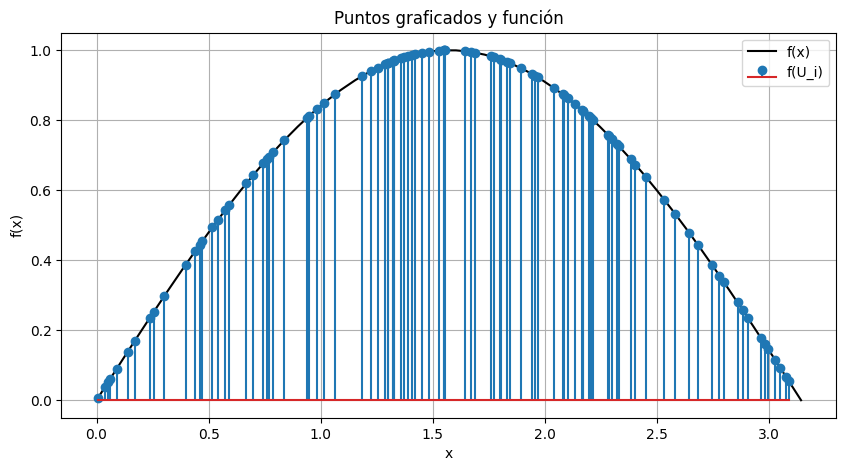

In [4]:
#Se hace la realización aleatoria de las n U_i
U_is = rnd.uniform(low=a, high=b, size=n) #vector aleatorio iid de tamaño n, con distribución uniforme

#Se evalúa cada una y se calcula el estimador
f_de_U_i = f(U_is) #Lo hace para cada i y genera un vector de f(U_i)

#Ploteo de resultados
plt.figure(figsize = (10,5))
xs = np.linspace(a,b)
ys = f(xs)
plt.plot(xs, ys, label='f(x)', c='k')
plt.stem(U_is, f_de_U_i, label='f(U_i)')
plt.title('Puntos graficados y función')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.plot()
plt.show()

Para este ejemplo, el valor verdadero es:

$$ \int_{0}^{\pi} sin(x)dx = (-cos(x)) |_{0}^{\pi} = 1-cos(\pi) = 2 . $$

In [6]:
#Estimación
I_estimado = f_de_U_i.mean()*(b-a) #.mean() hace la media muestral
I_verdadero = 2 #Modificar si se modifica f

print('El valor estimado es:', I_estimado)
print('El valor verdadero es:', I_verdadero)

El valor estimado es: 2.098893712972244
El valor verdadero es: 2


## Ejercicio 3, parte 2

La siguiente sección se hizo basada en la estimación que sugiere el ejercicio 3.2:

$$ \frac{\#\{i:1\leq i\leq n \,\,\,\text{y}\,\,\, U_i \in D\}}{n} \xrightarrow[n]{c.s.} área(D)$$

In [8]:
#Parámetros
n = 5000

#En este ejemplo se hará un circulo centrado en c y de radio r. Recordar que debe estar incluido en el cuadrado [0,1]x[0,1]
c = [0.5, 0.5] #coordenadas del centro (c_x, c_y)
r = 0.5

Como ejemplo, se hará que $D$ sea el círculo de radio $r$, centrado en $c=(c_x, c_y)$, que tiene área $\pi r^2$ 

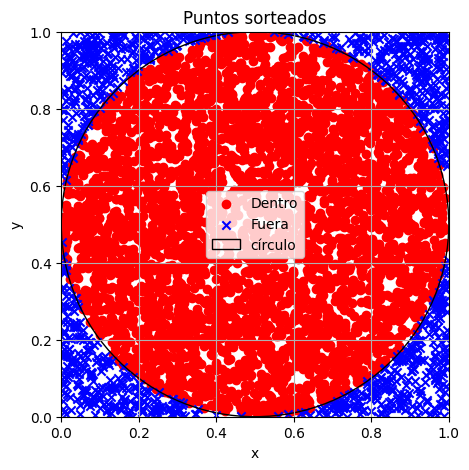

In [9]:
#Se hace la realización aleatoria de las n U_i
U_is = rnd.uniform(low=0, high=1, size=(n,2))

#Clasificación
c = np.array(c)
U_is_dentro = U_is[la.norm(U_is-c, axis=1)<r] #Selecciona los U_i tal que: |U_i-c|<r
U_is_fuera = U_is[la.norm(U_is-c, axis=1)>=r] #Selecciona los U_i tal que: |U_i-c|>=r

#Ploteo de resultados
fig, ax = plt.subplots(figsize = (5,5))
plt.scatter(U_is_dentro[:,0],U_is_dentro[:,1], c='r', marker='o', label='Dentro')
plt.scatter(U_is_fuera[:,0],U_is_fuera[:,1], c='b', marker='x', label='Fuera')
circulo = plt.Circle( c, r , fill = False , label='círculo')
ax.add_patch( circulo )
ax.set_title('Puntos sorteados')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.legend()
plt.grid(True)
plt.plot()
plt.show()

In [10]:
#Estimación
A_estimado = len(U_is_dentro)/n #.mean() hace la media muestral
A_verdadero = np.pi*r**2 

print('El valor estimado es:', A_estimado)
print('El valor verdadero es:', A_verdadero)

El valor estimado es: 0.7818
El valor verdadero es: 0.7853981633974483


**Observación:** A partir de este ejemplo se puede tener una estimación de $\pi$, dado que $\pi = \frac{area(D)}{r^2}$

In [11]:
#Estimación de PI
print('El valor de PI estimado es:', A_estimado/r**2)
print('El valor de PI verdadero es:', np.pi)

El valor de PI estimado es: 3.1272
El valor de PI verdadero es: 3.141592653589793
